<a href="https://colab.research.google.com/github/pedroigp/estudospython/blob/main/Tarefa_EstatisticaPython.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Perguntas geradoras:

1) Calcule a média, desvio padrão e correlação entre as variáveis price e carlength. Através de um gráfico apropriado, mostre como os valores dessas variáveis se distribuem.

2) Faça um gráfico de dispersão (scatterplot) com as duas variaíves. Com base no gráfico e na correlação calculada anteriormente, discta se a o comprimento do carro (carlength) é um bom preditor de seu preço (price).

3) Com base no artigo acima, regrida a variável carlength em price. A variável carlength é de fato uma boa preditora para o preço (price)? Como o preço varia em função tamanho do carro.

In [62]:
import numpy as np
import pandas as pd
import seaborn as sns
#from scipy import stats
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [63]:
# Carregando os dados em um dataframe
df_carros = pd.read_csv('CarPrice_Assignment.csv')
df_carros.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [64]:
# visão geral do dataframe
df_carros.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


1) Calcule a média, desvio padrão e correlação entre as variáveis price e carlength. Através de um gráfico apropriado, mostre como os valores dessas variáveis se distribuem.

In [65]:
media_price = np.mean(df_carros['price'])
media_carlength = np.mean(df_carros['carlength'])
print(f'Média do preço: {media_price}')
print(f'Média do comprimento do carro: {media_carlength}')
desvio_padrao_price = np.std(df_carros['price'])
desvio_padrao_carlength = np.std(df_carros['carlength'])
print(f'Desvio padrão do preço: {desvio_padrao_price}')
print(f'Desvio padrão do comprimento do carro: {desvio_padrao_carlength}')
correlacao = np.corrcoef(df_carros['price'], df_carros['carlength'])
print(f'Correlação: {correlacao}')

Média do preço: 13276.710570731706
Média do comprimento do carro: 174.04926829268288
Desvio padrão do preço: 7969.34350572002
Desvio padrão do comprimento do carro: 12.307160792874921
Correlação: [[1.         0.68292002]
 [0.68292002 1.        ]]


array([[<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'carlength'}>]], dtype=object)

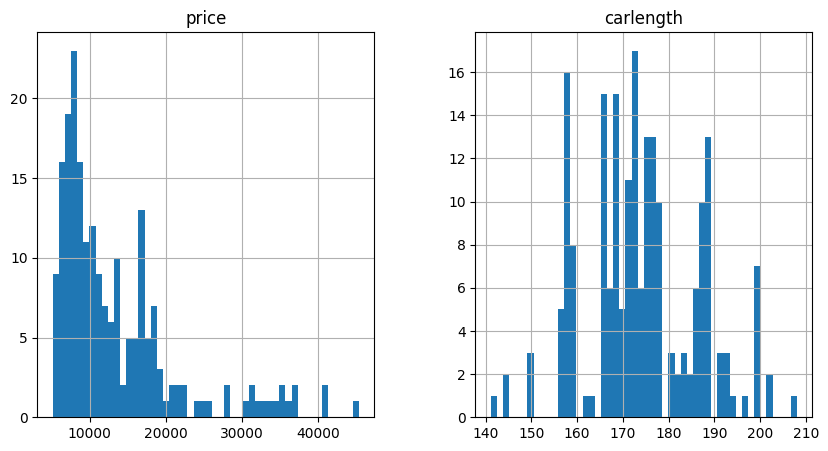

In [66]:
# Usando Histograma para visualizar a distribuição dos dados
df_carros[['price', 'carlength']].hist(bins=50, figsize=(10,5))

2) Faça um gráfico de dispersão (scatterplot) com as duas variaíves. Com base no gráfico e na correlação calculada anteriormente, discta se a o comprimento do carro (carlength) é um bom preditor de seu preço (price).

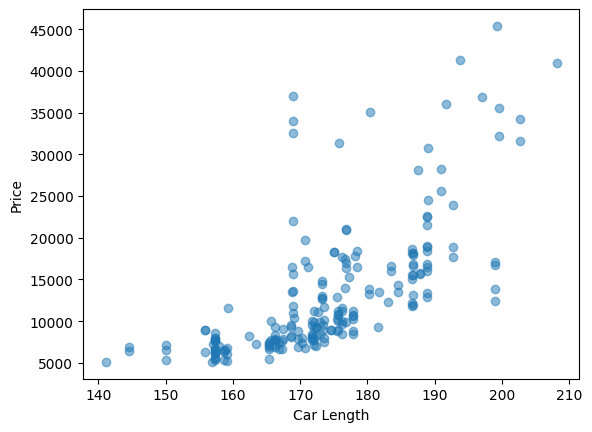

In [67]:
plt.scatter(df_carros['carlength'], df_carros['price'], alpha=0.5)
plt.xlabel('Car Length')
plt.ylabel('Price')
plt.show()

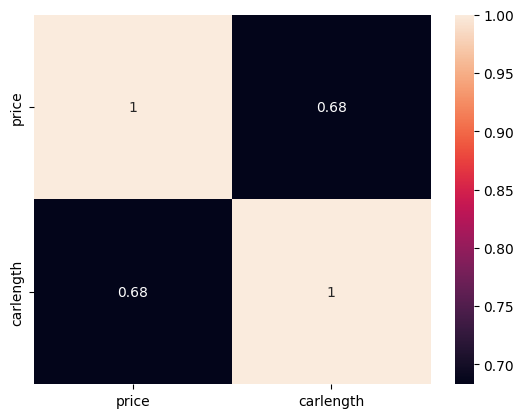

In [68]:
# Matriz de Correlação
correlation_matrix = df_carros[['price', 'carlength']].corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()

In [69]:
# criando variáveis que serão usadas daqui para frente
# variável preditora
X = np.array(df_carros['carlength'])
# variável alvo
y = np.array(df_carros['price'])

In [70]:
# é necessário adicionar uma constante a matriz X
X_sm = sm.add_constant(X)
# OLS vem de Ordinary Least Squares e o método fit irá treinar o modelo
results = sm.OLS(y, X_sm).fit()
# mostrando as estatísticas do modelo
results.summary()
# mostrando as previsões para o mesmo conjunto passado
results.predict(X_sm)

array([10955.39981299, 10955.39981299, 12016.71836406, 14404.68510397,
       14404.68510397, 14714.23634804, 21524.3637174 , 21524.3637174 ,
       21524.3637174 , 15112.23080469, 14493.12831656, 14493.12831656,
       14493.12831656, 14493.12831656, 19888.1642845 , 19888.1642845 ,
       22010.80138665, 23425.89278807, -1293.98513061,  5250.81260099,
        6533.23918353,  5869.91508911,  5869.91508911,  5869.91508911,
        5869.91508911,  5869.91508911,  5869.91508911,  5869.91508911,
       13520.25297808, 12901.15048996,   253.7710897 ,   253.7710897 ,
        2641.73782961,  2641.73782961,  2641.73782961,  8567.43307309,
        5781.47187652, 10380.51893116, 10380.51893116, 13874.02582844,
       13874.02582844, 13874.02582844, 11088.06463188, 11795.61033259,
        5250.81260099,  5250.81260099, 12635.82085219, 24575.65455173,
       24575.65455173, 21082.14765446,  6665.90400242,  6665.90400242,
        6665.90400242, 10070.9676871 , 10070.9676871 , 11043.84302558,
      

3) Com base no artigo acima, regrida a variável carlength em price. A variável carlength é de fato uma boa preditora para o preço (price)? Como o preço varia em função tamanho do carro.

In [71]:
# Escrevendo o modelo preditor
X = df_carros[['carlength']] # Variáveis características - Using double brackets here to create a DataFrame
y = df_carros['price'] # O que eu quero prever.

# Divisão das bases de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(len(X_train), "treinamento +", len(X_test), "teste")

164 treinamento + 41 teste


In [72]:
y

,price
0,13495.0
1,16500.0
2,16500.0
3,13950.0
4,17450.0
...,...
200,16845.0
201,19045.0
202,21485.0
203,22470.0


In [73]:
type(X_train)

pandas.core.frame.DataFrame

In [74]:
# criando e treinando o modelo
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

predictions = lin_reg.predict(X_test)

In [75]:
# Validando modelo de previsão
def calculate_mape(labels, predictions):
    errors = np.abs(labels - predictions)
    relative_errors = errors / np.abs(labels)
    mape = np.mean(relative_errors) * 100
    return mape

# Função validadora para Modelo de Regressão
erro_medio_quadratico = np.sqrt(mean_squared_error(y_test, predictions))
erro_absoluto_medio = mean_absolute_error(y_test, predictions)
r_quadrado = r2_score(y_test, predictions)

# Calcular o MAPE
mape_result = calculate_mape(y_test, predictions)

# Imprimir o resultado
print(f'Erro Médio Quadrático: {erro_medio_quadratico}')
print(f'Erro Absoluto Médio: {erro_absoluto_medio}')
print(f'R² (coeficiente de determinação): {r_quadrado}')
print(f"O MAPE é: {mape_result:.2f}%")

Erro Médio Quadrático: 5727.90493493903
Erro Absoluto Médio: 4229.113154459729
R² (coeficiente de determinação): 0.58440304182488
O MAPE é: 32.74%


Avaliando os resultados
Vamos avaliar o modelo com as seguintes métricas:

O RMSE é a raiz quadrada do MSE (Erro Quadrático Médio - Mean Squared Error). o MSE é a média dos quadrados das diferenças entre os valores reais e os valores previstos. O MSE mede a média dos quadrados das diferenças entre os valores previstos pelo modelo e os valores reais observados no conjunto de dados. Quanto menor o valor do MSE, melhor o ajuste do modelo aos dados. O MSE nos diz a margem de erro em $.

O MAE (Erro Médio Absoluto - Mean Absolute Error), onde um valor pequeno para MAE significa que suas previsões estão próximas das reais.

O "R-squared (R2)" fornece informações sobre o ajuste geral do modelo. O valor do R2 pode variar entre 0 e 1, quanto mais próximo de 1, melhor, pois indica que o modelo explica uma maior proporção da variabilidade nos dados. O R2 é também uma das principais métricas de avaliação do modelo de regressão.

o MAPE (Mean Absolute Percentage Error) mede a magnitude média do erro produzido por um modelo ou o quão distantes estão as previsões, em média. Um valor MAPE de 20% significa que a diferença percentual absoluta média entre as previsões e os valores reais é de 20%.

Conclusão:
A variável carlength não é uma boa preditora para o preço. O r² é muito baixo. A diferença entre os valores reais e previstos são grandes.